## Machine Learning with "My Beers" Dataset

In this notebook, I would like to test out different supervised learning algorithms to see which one most accurately predicts beer ratings. 

1) Use Random Forest algorithm to help us select key features.

2) Test Algorithms with the key features. Key algorithms to test: Linear Regression, Random Forest, and Gradient Boosting.

3) Understand differences in the features being selected.

In [2]:
import pandas as pd #for building dataframes from CSV files
import glob, os #for reading file names
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import matplotlib.pyplot as plt 
%matplotlib inline  

In [3]:
#Initialize dataframes given API data
my_beer_df = pd.read_csv('../data/my-final-beer-data.csv')
my_new_beer_df = pd.read_csv('../data/final-avg-user-beer-data.csv')

In [4]:
my_beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 35 columns):
beer.auth_rating                  181 non-null float64
beer.beer_abv                     181 non-null float64
beer.beer_description             181 non-null object
beer.beer_ibu                     181 non-null int64
beer.beer_label                   181 non-null object
beer.beer_name                    181 non-null object
beer.beer_slug                    181 non-null object
beer.beer_style                   181 non-null object
beer.bid                          181 non-null int64
beer.created_at                   181 non-null object
beer.rating_count                 181 non-null int64
beer.rating_score                 181 non-null float64
beer.wish_list                    181 non-null bool
brewery.brewery_active            181 non-null int64
brewery.brewery_id                181 non-null int64
brewery.brewery_label             181 non-null object
brewery.brewery_name              1

In [5]:
my_new_beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19838 entries, 0 to 19837
Data columns (total 23 columns):
beer_abv                          19838 non-null float64
beer_ibu                          19838 non-null int64
beer_name                         19838 non-null object
beer_style                        19838 non-null object
bid                               19838 non-null int64
brewery.brewery_id                19838 non-null int64
brewery.brewery_name              19838 non-null object
brewery.brewery_type              19838 non-null object
brewery.country_name              19838 non-null object
brewery.location.brewery_city     19838 non-null object
brewery.location.brewery_state    19838 non-null object
brewery.location.lat              19838 non-null float64
brewery.location.lng              19838 non-null float64
created_at                        19838 non-null object
is_homebrew                       19838 non-null int64
is_in_production                  19838 non-null int

In [6]:
#Select only certain columns for now
my_beer_df.columns

Index(['beer.auth_rating', 'beer.beer_abv', 'beer.beer_description',
       'beer.beer_ibu', 'beer.beer_label', 'beer.beer_name', 'beer.beer_slug',
       'beer.beer_style', 'beer.bid', 'beer.created_at', 'beer.rating_count',
       'beer.rating_score', 'beer.wish_list', 'brewery.brewery_active',
       'brewery.brewery_id', 'brewery.brewery_label', 'brewery.brewery_name',
       'brewery.brewery_slug', 'brewery.contact.facebook',
       'brewery.contact.instagram', 'brewery.contact.twitter',
       'brewery.contact.url', 'brewery.country_name',
       'brewery.location.brewery_city', 'brewery.location.brewery_state',
       'brewery.location.lat', 'brewery.location.lng', 'count',
       'first_checkin_id', 'first_created_at', 'first_had', 'rating_score',
       'recent_checkin_id', 'recent_created_at', 'recent_created_at_timezone'],
      dtype='object')

In [7]:
#Creating the dataframe for machine learning to test
new_beer_df = my_beer_df[['beer.beer_abv',
       'beer.beer_ibu', 
       'beer.beer_style', 'beer.bid', 'beer.rating_count',
       'beer.rating_score', 'brewery.brewery_active',
       'brewery.brewery_id', 'brewery.country_name',
       'brewery.location.brewery_city', 'brewery.location.brewery_state',]]

In [8]:
#Creating the dataset of untasted beers
untasted_beer_df = my_new_beer_df[['beer_abv',
       'beer_ibu', 
       'beer_style', 'bid', 'rating_count',
       'rating_score', 'is_in_production',
       'brewery.brewery_id', 'brewery.country_name',
       'brewery.location.brewery_city', 'brewery.location.brewery_state',]]

In [9]:
my_ratings = my_beer_df['beer.auth_rating']

In [10]:
new_beer_df.head()

,beer.beer_abv,beer.beer_ibu,beer.beer_style,beer.bid,beer.rating_count,beer.rating_score,brewery.brewery_active,brewery.brewery_id,brewery.country_name,brewery.location.brewery_city,brewery.location.brewery_state
0,7.0,61,IPA - American,166939,9591,3.818,1,14828,United States,Denver,CO
1,5.9,55,Pale Ale - American,807339,2622,3.828,1,1860,United States,Boulder,CO
2,6.8,82,IPA - American,5382,43728,3.660,1,836,United States,Kihei,HI
3,6.2,55,IPA - American,4083,13940,3.458,1,17,United States,Juneau,AK
4,5.9,80,IPA - American,556978,60577,3.775,1,1243,United States,Athens,GA


In [11]:
new_beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
beer.beer_abv                     181 non-null float64
beer.beer_ibu                     181 non-null int64
beer.beer_style                   181 non-null object
beer.bid                          181 non-null int64
beer.rating_count                 181 non-null int64
beer.rating_score                 181 non-null float64
brewery.brewery_active            181 non-null int64
brewery.brewery_id                181 non-null int64
brewery.country_name              181 non-null object
brewery.location.brewery_city     181 non-null object
brewery.location.brewery_state    181 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ KB


In [12]:
untasted_beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19838 entries, 0 to 19837
Data columns (total 11 columns):
beer_abv                          19838 non-null float64
beer_ibu                          19838 non-null int64
beer_style                        19838 non-null object
bid                               19838 non-null int64
rating_count                      19838 non-null int64
rating_score                      19838 non-null float64
is_in_production                  19838 non-null int64
brewery.brewery_id                19838 non-null int64
brewery.country_name              19838 non-null object
brewery.location.brewery_city     19838 non-null object
brewery.location.brewery_state    19838 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 1.7+ MB


In [13]:
#Need to create categorical variables for the necessary features
new_beer_df["beer.beer_style"] = new_beer_df["beer.beer_style"].astype('category')
new_beer_df["beer.beer_style_cat"] = new_beer_df["beer.beer_style"].cat.codes
new_beer_df["brewery.country_name"] = new_beer_df["brewery.country_name"].astype('category')
new_beer_df["brewery.country_name_cat"] = new_beer_df["brewery.country_name"].cat.codes
new_beer_df["brewery.location.brewery_city"] = new_beer_df["brewery.location.brewery_city"].astype('category')
new_beer_df["brewery.location.brewery_city_cat"] = new_beer_df["brewery.location.brewery_city"].cat.codes
new_beer_df["brewery.location.brewery_state "] = new_beer_df["brewery.location.brewery_state "].astype('category')
new_beer_df["brewery.location.brewery_state _cat"] = new_beer_df["brewery.location.brewery_state "].cat.codes

/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

KeyError: 'brewery.location.brewery_state '

In [14]:
#Need to create categorical variables for the necessary features
untasted_beer_df["beer_style"] = untasted_beer_df["beer_style"].astype('category')
untasted_beer_df["beer_style_cat"] = untasted_beer_df["beer_style"].cat.codes
untasted_beer_df["brewery.country_name"] = untasted_beer_df["brewery.country_name"].astype('category')
untasted_beer_df["brewery.country_name_cat"] = untasted_beer_df["brewery.country_name"].cat.codes
untasted_beer_df["brewery.location.brewery_city"] = untasted_beer_df["brewery.location.brewery_city"].astype('category')
untasted_beer_df["brewery.location.brewery_city_cat"] = untasted_beer_df["brewery.location.brewery_city"].cat.codes
untasted_beer_df["brewery.location.brewery_state "] = untasted_beer_df["brewery.location.brewery_state "].astype('category')
untasted_beer_df["brewery.location.brewery_state _cat"] = untasted_beer_df["brewery.location.brewery_state "].cat.codes

/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

KeyError: 'brewery.location.brewery_state '

In [15]:
new_beer_df.columns

Index(['beer.beer_abv', 'beer.beer_ibu', 'beer.beer_style', 'beer.bid',
       'beer.rating_count', 'beer.rating_score', 'brewery.brewery_active',
       'brewery.brewery_id', 'brewery.country_name',
       'brewery.location.brewery_city', 'brewery.location.brewery_state',
       'beer.beer_style_cat', 'brewery.country_name_cat',
       'brewery.location.brewery_city_cat'],
      dtype='object')

In [16]:
untasted_beer_df.columns

Index(['beer_abv', 'beer_ibu', 'beer_style', 'bid', 'rating_count',
       'rating_score', 'is_in_production', 'brewery.brewery_id',
       'brewery.country_name', 'brewery.location.brewery_city',
       'brewery.location.brewery_state', 'beer_style_cat',
       'brewery.country_name_cat', 'brewery.location.brewery_city_cat'],
      dtype='object')

In [17]:
#includes the avg user ratings for each beer
final_beer_df = new_beer_df[['beer.beer_abv', 'beer.beer_ibu', 'beer.bid',
       'beer.rating_count', 'beer.rating_score', 'brewery.brewery_active',
       'brewery.brewery_id',
       'beer.beer_style_cat', 'brewery.country_name_cat',
       'brewery.location.brewery_city_cat']]

In [18]:
# do NOT include avg user ratings
final_beer_df2 = new_beer_df[['beer.beer_abv', 'beer.beer_ibu',
        'brewery.brewery_active',
       'brewery.brewery_id',
       'beer.beer_style_cat', 'brewery.country_name_cat',
       'brewery.location.brewery_city_cat']]

In [19]:
final_untasted_beer_df = untasted_beer_df[['beer_abv', 'beer_ibu', 'bid',
       'rating_count', 'rating_score', 'is_in_production',
       'brewery.brewery_id',
       'beer_style_cat', 'brewery.country_name_cat',
       'brewery.location.brewery_city_cat']]

## Let's Start with Random Forests

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y = my_ratings # define the target variable (dependent variable) as y

In [45]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(final_beer_df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(144, 10) (144,)
(37, 10) (37,)


In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [47]:
print('Score: ' + str(rf.score(X_test, y_test)))

Score: 0.549156343443


In [48]:
from sklearn.grid_search import GridSearchCV
param_grid = {'oob_score': [True, False], 
                 'min_samples_split': [8, 16], 
                 'min_samples_leaf': [4, 8]}
rfc = GridSearchCV(RandomForestRegressor(), param_grid, cv=10)
rfc.fit(X_train, y_train)

/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This prob

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'oob_score': [True, False], 'min_samples_split': [8, 16], 'min_samples_leaf': [4, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [49]:
print('Acc: ' + str(rfc.score(X_test, y_test)))

Acc: 0.574064118793


# Leverage RF algorithm for rating predictions on untasted beer

In [53]:
rf.predict(final_untasted_beer_df)

array([ 3.65 ,  3.65 ,  3.625, ...,  3.7  ,  4.025,  4.025])

In [68]:
predictions_df = pd.DataFrame(rf.predict(final_untasted_beer_df), columns=['predicted_values'])

In [70]:
predictions_df.head()

,predicted_values
0,3.650
1,3.650
2,3.625
3,3.650
4,3.800


In [71]:
final_predict_df = pd.concat([final_untasted_beer_df, predictions_df], axis=1)

In [72]:
final_predict_df.columns

Index(['beer_abv', 'beer_ibu', 'bid', 'rating_count', 'rating_score',
       'is_in_production', 'brewery.brewery_id', 'beer_style_cat',
       'brewery.country_name_cat', 'brewery.location.brewery_city_cat',
       'predicted_values'],
      dtype='object')

In [73]:
final_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19838 entries, 0 to 19837
Data columns (total 11 columns):
beer_abv                             19838 non-null float64
beer_ibu                             19838 non-null int64
bid                                  19838 non-null int64
rating_count                         19838 non-null int64
rating_score                         19838 non-null float64
is_in_production                     19838 non-null int64
brewery.brewery_id                   19838 non-null int64
beer_style_cat                       19838 non-null int16
brewery.country_name_cat             19838 non-null int16
brewery.location.brewery_city_cat    19838 non-null int16
predicted_values                     19838 non-null float64
dtypes: float64(3), int16(3), int64(5)
memory usage: 1.3 MB


In [77]:
final_predict_df.sort_values(by='predicted_values', ascending=False).head(5)

,beer_abv,beer_ibu,bid,rating_count,rating_score,is_in_production,brewery.brewery_id,beer_style_cat,brewery.country_name_cat,brewery.location.brewery_city_cat,predicted_values
1714,5.4,65,12210,7925,4.30297,1,2562,98,119,816,4.600
9402,13.5,42,23271,16710,4.36988,1,524,5,119,1480,4.500
16727,12.5,52,5818,16240,4.29723,1,2712,5,119,1704,4.475
17568,5.5,11,6860,63888,4.02619,1,5213,138,11,260,4.425
18335,14.0,82,7936,15479,4.53014,1,524,154,119,1480,4.425


In [81]:
my_new_beer_df[my_new_beer_df['bid']==7936]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
18335,14.0,82,Parabola,Stout - Russian Imperial,7936,524,Firestone Walker Brewing Company,Micro Brewery,United States,Paso Robles,...,"Sun, 07 Nov 2010 16:38:18 +0000",0,1,15479,4.53014,654,20940,17930,4.51309,False


## Which features are best?

In [93]:
#list(zip(final_beer_df.columns, rf.feature_importances_))
plot_df = pd.DataFrame()
plot_df['col_names'] = final_beer_df.columns
plot_df['Predictions'] = rf.feature_importances_
plot_df.sort_values(by='Predictions', ascending=False)

,col_names,Predictions
4,beer.rating_score,0.619225
8,brewery.country_name_cat,0.074211
7,beer.beer_style_cat,0.068626
6,brewery.brewery_id,0.055966
2,beer.bid,0.044877
9,brewery.location.brewery_city_cat,0.044672
3,beer.rating_count,0.042952
0,beer.beer_abv,0.037505
1,beer.beer_ibu,0.011967
5,brewery.brewery_active,0.000000


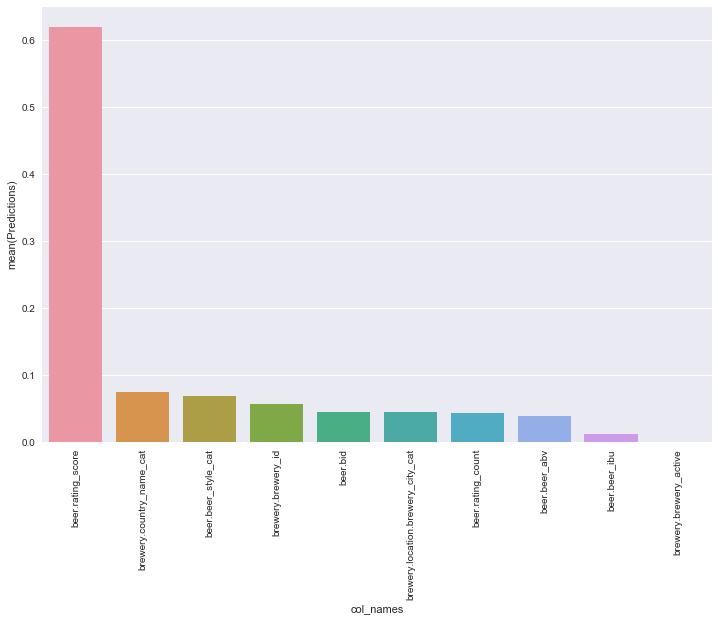

In [65]:
plt.rc("figure", figsize=(12, 8))
g = sns.barplot(x = "col_names", y = "Predictions", data = plot_df.sort_values(by='Predictions', ascending=False))
g.set_xticklabels(labels=plot_df.sort_values(by='Predictions', ascending=False)['col_names'],rotation=90)

## Try again WITHOUT including the average user ratings for each beer

In [130]:
# create training and testing vars
X_train2, X_test2, y_train2, y_test2 = train_test_split(final_beer_df2, y, test_size=0.2)
print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

(144, 7) (144,)
(37, 7) (37,)


In [131]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor()
rf2.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [132]:
print('Score: ' + str(rf2.score(X_test2, y_test2)))

Score: 0.404194748359


In [133]:
#list(zip(final_beer_df.columns, rf.feature_importances_))
plot_df2 = pd.DataFrame()
plot_df2['col_names'] = final_beer_df2.columns
plot_df2['Predictions'] = rf2.feature_importances_
plot_df2.sort_values(by='Predictions', ascending=False)

,col_names,Predictions
0,beer.beer_abv,0.231872
4,beer.beer_style_cat,0.227105
1,beer.beer_ibu,0.153688
6,brewery.location.brewery_city_cat,0.145894
5,brewery.country_name_cat,0.129063
3,brewery.brewery_id,0.112377
2,brewery.brewery_active,0.000000


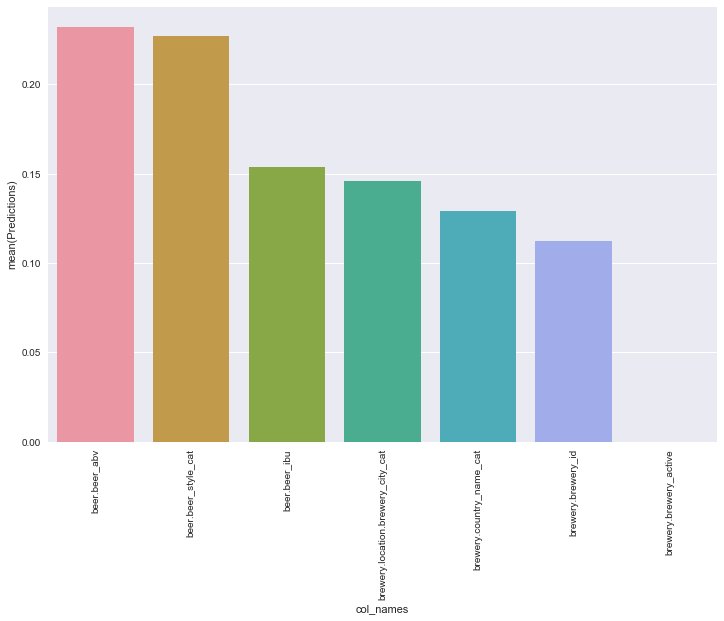

In [134]:
g2 = sns.barplot(x = "col_names", y = "Predictions", data = plot_df2.sort_values(by='Predictions', ascending=False))
g2.set_xticklabels(labels=plot_df2.sort_values(by='Predictions', ascending=False)['col_names'],rotation=90)

## Next, Linear Regression

Similar to Random Forests, we will use two different feature sets and compare their results.

In [25]:
final_beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 10 columns):
beer.beer_abv                        181 non-null float64
beer.beer_ibu                        181 non-null int64
beer.bid                             181 non-null int64
beer.rating_count                    181 non-null int64
beer.rating_score                    181 non-null float64
brewery.brewery_active               181 non-null int64
brewery.brewery_id                   181 non-null int64
beer.beer_style_cat                  181 non-null int8
brewery.country_name_cat             181 non-null int8
brewery.location.brewery_city_cat    181 non-null int8
dtypes: float64(2), int64(5), int8(3)
memory usage: 10.5 KB


In [26]:
# create training and testing vars
X_train3, X_test3, y_train3, y_test3 = train_test_split(final_beer_df, y, test_size=0.2)
print(X_train3.shape, y_train3.shape)
print(X_test3.shape, y_test3.shape)

(144, 10) (144,)
(37, 10) (37,)


In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train3, y_train3)

/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print('Score: ' + str(lr.score(X_test3, y_test3)))

Score: 0.480038461922


## Cross-validation

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cv_scores = cross_val_score(lr, final_beer_df, y, cv=5)
cv_scores

array([ 0.55283278,  0.5553776 ,  0.55298489,  0.5829174 ,  0.3660915 ])

In [31]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Accuracy: 0.52 (+/- 0.16)


## Again, Linear Regression with a different dataset

In [32]:
# create training and testing vars
X_train4, X_test4, y_train4, y_test4 = train_test_split(final_beer_df2, y, test_size=0.2)
print(X_train4.shape, y_train4.shape)
print(X_test4.shape, y_test4.shape)

(144, 7) (144,)
(37, 7) (37,)


In [33]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X_train4, y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print('Score: ' + str(lr2.score(X_test4, y_test4)))

Score: 0.189153310949


In [35]:
cv_scores2 = cross_val_score(lr2, final_beer_df2, y, cv=5)
cv_scores2

array([-0.70890659,  0.34209997,  0.07788943, -0.7087702 ,  0.05780742])

In [36]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores2.mean(), cv_scores2.std() * 2))

Accuracy: -0.19 (+/- 0.87)


## Finally, Gradient Boosting Regression

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [39]:
print('Score: ' + str(gb.score(X_test, y_test)))

Score: 0.607300785553


In [41]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, gb.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.1548


In [68]:
#list(zip(final_beer_df.columns, rf.feature_importances_))
plot_df3 = pd.DataFrame()
plot_df3['col_names'] = final_beer_df.columns
plot_df3['Predictions'] = gb.feature_importances_
plot_df3.sort_values(by='Predictions', ascending=False)

,col_names,Predictions
4,beer.rating_score,0.349069
9,brewery.location.brewery_city_cat,0.134612
3,beer.rating_count,0.110142
7,beer.beer_style_cat,0.088183
2,beer.bid,0.080057
0,beer.beer_abv,0.078674
8,brewery.country_name_cat,0.069058
6,brewery.brewery_id,0.061895
1,beer.beer_ibu,0.028311
5,brewery.brewery_active,0.000000


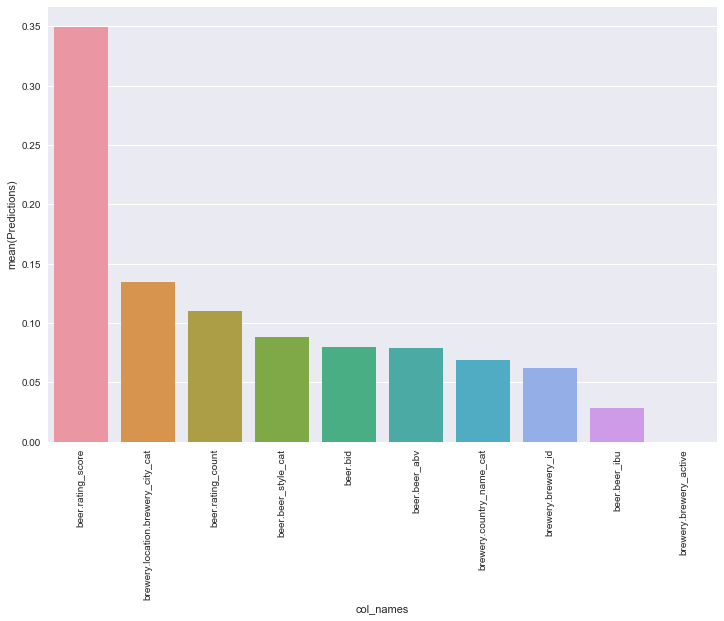

In [69]:
g3 = sns.barplot(x = "col_names", y = "Predictions", data = plot_df3.sort_values(by='Predictions', ascending=False))
g3.set_xticklabels(labels=plot_df3.sort_values(by='Predictions', ascending=False)['col_names'],rotation=90)

## Gradient Boosting w/o Other User Ratings

In [71]:
gb2 = GradientBoostingRegressor()
gb2.fit(X_train2, y_train2)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [73]:
print('Score: ' + str(gb2.score(X_test2, y_test2)))

Score: 0.215144760002


In [74]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test2, gb2.predict(X_test2))
print("MSE: %.4f" % mse)

MSE: 0.3275


In [75]:
#list(zip(final_beer_df.columns, rf.feature_importances_))
plot_df4 = pd.DataFrame()
plot_df4['col_names'] = final_beer_df2.columns
plot_df4['Predictions'] = gb2.feature_importances_
plot_df4.sort_values(by='Predictions', ascending=False)

,col_names,Predictions
4,beer.beer_style_cat,0.228076
0,beer.beer_abv,0.186487
6,brewery.location.brewery_city_cat,0.174476
5,brewery.country_name_cat,0.171728
3,brewery.brewery_id,0.147244
1,beer.beer_ibu,0.091989
2,brewery.brewery_active,0.000000


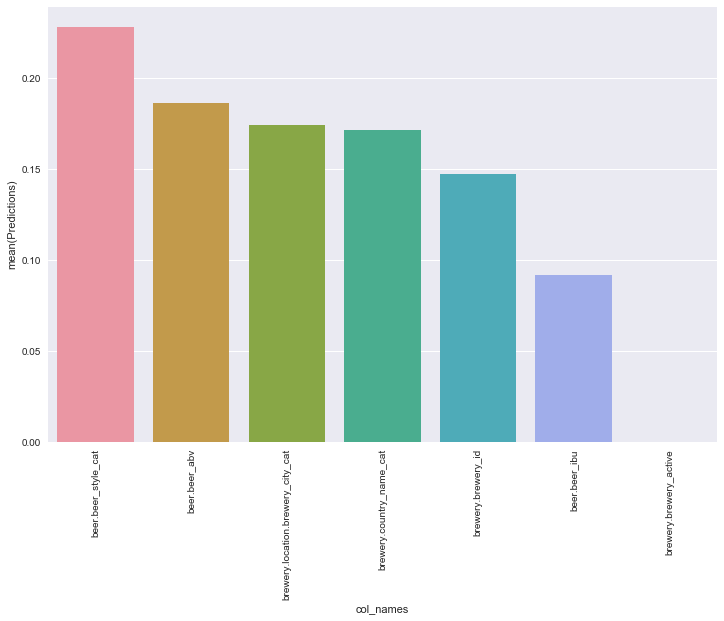

In [76]:
g4 = sns.barplot(x = "col_names", y = "Predictions", data = plot_df4.sort_values(by='Predictions', ascending=False))
g4.set_xticklabels(labels=plot_df4.sort_values(by='Predictions', ascending=False)['col_names'],rotation=90)